# [CDIA]LAB-λ-Introducción a ciencia de datos

# Introduccion

In [ ]:
import statistics

edades = [22, 24, 25, 27, 29, 30, 32, 33, 35, 38, 40, 42]

print("Cantidad:", len(edades))
print("Media:", statistics.mean(edades))
print("Mediana:", statistics.median(edades))
print("Moda:", statistics.mode(edades))
print("Desviación estándar:", statistics.stdev(edades))
print("Varianza:", statistics.variance(edades))

Cantidad: 12
Media: 31.416666666666668
Mediana: 31.0
Moda: 22
Desviación estándar: 6.444988656923981
Varianza: 41.53787878787879


In [ ]:
from scipy import stats

grupo_A = [22, 24, 25, 26, 27]
grupo_B = [30, 32, 33, 35, 36]

t_stat, p_value = stats.ttest_ind(grupo_A, grupo_B)

print("Estadístico t:", t_stat)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Resultado: hay diferencia significativa entre los grupos (se rechaza H0)")
else:
    print("Resultado: no hay diferencia significativa (no se rechaza H0)")

Estadístico t: -6.126329642911573
Valor p: 0.00028120526756468685
Resultado: hay diferencia significativa entre los grupos (se rechaza H0)


In [ ]:
# Datos de transacciones
datos = [
    {"Trans": "t1", "Soleado": "si", "Humedo": "si", "Ventoso": "si", "Llueve": "no"},
    {"Trans": "t2", "Soleado": "no", "Humedo": "no", "Ventoso": "si", "Llueve": "si"},
    {"Trans": "t3", "Soleado": "no", "Humedo": "si", "Ventoso": "no", "Llueve": "no"},
    {"Trans": "t4", "Soleado": "no", "Humedo": "no", "Ventoso": "no", "Llueve": "si"},
    {"Trans": "t5", "Soleado": "no", "Humedo": "si", "Ventoso": "si", "Llueve": "si"},
    {"Trans": "t6", "Soleado": "si", "Humedo": "si", "Ventoso": "si", "Llueve": "no"},
    {"Trans": "t7", "Soleado": "no", "Humedo": "no", "Ventoso": "si", "Llueve": "no"},
    {"Trans": "t8", "Soleado": "no", "Humedo": "si", "Ventoso": "no", "Llueve": "si"},
    {"Trans": "t9", "Soleado": "si", "Humedo": "si", "Ventoso": "no", "Llueve": "no"}
]

# Total de transacciones
total_trans = len(datos)

Soporte (Sp): 0.0
Confianza (Cf): 0.0


In [ ]:
# |P| = Transacciones donde ocurre "Soleado"
p = [d for d in datos if d["Soleado"] == "si"]

# |R| = Transacciones donde ocurre "Soleado y Llueve"
r = [d for d in p if d["Llueve"] == "si"]

# Cálculos
soporte = len(r) / total_trans
confianza = len(r) / len(p)

# Resultados
print("Soporte (Sp):", soporte)
print("Confianza (Cf):", confianza)

In [ ]:
# |P| = Transacciones donde ocurre "Soleado" y "Humedo"
p = [d for d in datos if d["Soleado"] == "si" and d["Humedo"] == "si"]

# |R| = Transacciones de |P| donde además "Llueve" = "no"
r = [d for d in p if d["Llueve"] == "no"]

# Cálculos
soporte = len(r) / total_trans
confianza = len(r) / len(p)

# Resultados
print("Soporte (Sp):", soporte)
print("Confianza (Cf):", confianza)

# Librerias

In [ ]:
!pip install seaborn --quiet

In [ ]:
import pandas as pd # --> Esencial para manipulación y análisis de datos en forma de tablas
import numpy as np # --> Ofrece herramientas para cálculo numérico y manejo de arrays.
import matplotlib.pyplot as plt # --> Para generar gráficos como líneas, barras, histogramas, etc.
import seaborn as sns # --> Visualizaciones estadísticas más elegantes y avanzadas que matplotlib.
from scipy import stats # --> Análisis estadístico avanzado (distribuciones, pruebas de hipótesis, correlaciones).
sns.set(style="darkgrid")

## 1. Creacion de datos de ejemplo

In [ ]:
np.random.seed(42)

edad = np.random.normal(loc=35, scale=10, size=100).round().astype(int)
departamento = np.random.choice(['IT', 'RRHH', 'Marketing'], size=100)
salario_base = edad * 1000

plus = np.zeros(100)

for i, depto in enumerate(departamento):
    if depto == 'IT':
        plus[i] = np.random.uniform(1250, 10000)
    elif depto == 'RRHH':
        plus[i] = np.random.uniform(1000, 5000)
    else:  # Marketing
        plus[i] = np.random.uniform(1000, 4000)

ruido = np.random.normal(0, 2000, 100)
salario = salario_base + plus + ruido

df = pd.DataFrame({
    'Edad': edad,
    'Departamento': departamento,
    'Salario': salario
})

df.head()

,Edad,Departamento,Salario
0,40,IT,44293.085257
1,34,RRHH,37788.099198
2,41,IT,53955.522160
3,50,IT,52866.425331
4,33,Marketing,33450.707178


## 2. Estadística Descriptiva

In [ ]:
descripcion = df.describe()
descripcion.index = descripcion.index.map({
    'count': 'cantidad',
    'mean': 'media',
    'std': 'desviación estándar',
    'min': 'mínimo',
    '25%': '25%',
    '50%': 'mediana',
    '75%': '75%',
    'max': 'máximo'
})
print(descripcion)

                           Edad       Salario
cantidad             100.000000    100.000000
media                 33.980000  37842.769944
desviación estándar    9.107639   9273.350631
mínimo                 9.000000  12491.817195
25%                   29.000000  32747.020406
mediana               34.000000  37753.915060
75%                   39.250000  44197.031427
máximo                54.000000  60625.191552


In [ ]:
print("Media Edad:", df['Edad'].mean())
print("Mediana Edad:", df['Edad'].median())
print("Moda Edad:", df['Edad'].mode()[0])

Media Edad: 33.98
Mediana Edad: 34.0
Moda Edad: 30


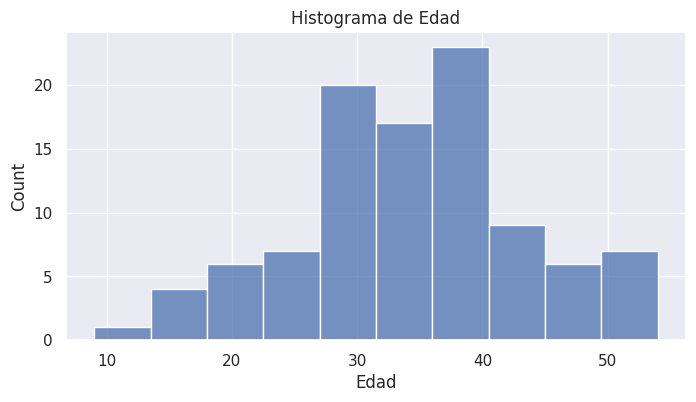

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Edad'], bins=10, kde=False)
plt.title('Histograma de Edad')
plt.show()

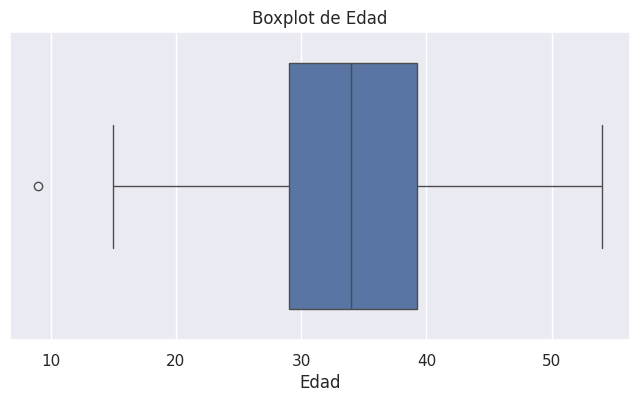

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Edad'])
plt.title('Boxplot de Edad')
plt.show()

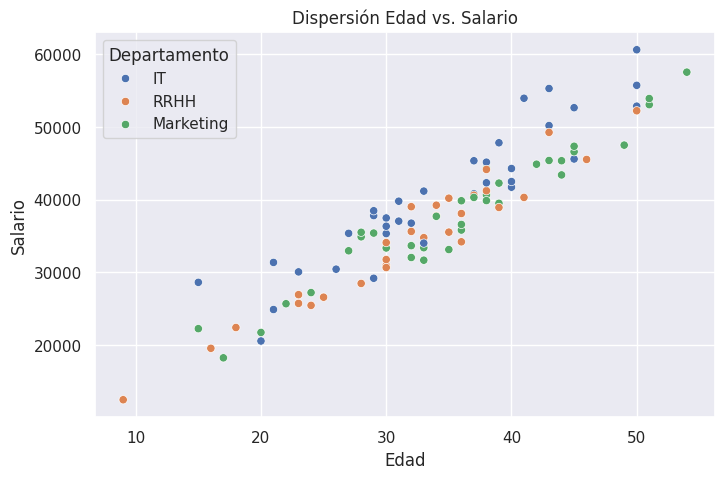

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Edad', y='Salario', data=df, hue='Departamento')
plt.title('Dispersión Edad vs. Salario')
plt.show()

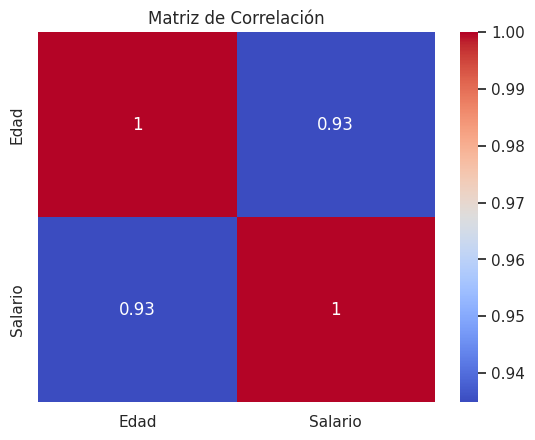

In [ ]:
corr = df[['Edad', 'Salario']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# 3. Estadística Inferencial

## Regresion lineal

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Variables
X = df[['Edad']]  # Variable independiente (debe ser DataFrame)
y = df['Salario']  # Variable dependiente

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X, y)


LinearRegression()

Coeficiente: 951.97
Intersección: 5494.91


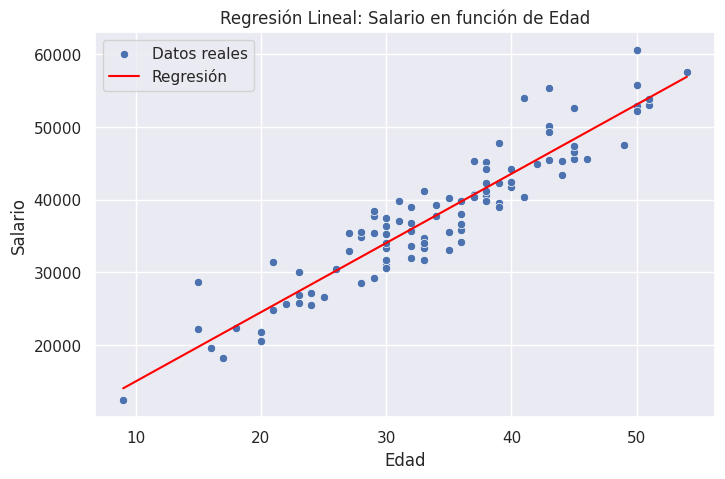

In [ ]:
# Predicciones
df['Salario_Predicho'] = modelo.predict(X)

# Mostrar coeficientes
print(f"Coeficiente: {modelo.coef_[0]:.2f}")
print(f"Intersección: {modelo.intercept_:.2f}")

# Graficar
plt.figure(figsize=(8,5))
sns.scatterplot(x='Edad', y='Salario', data=df, label='Datos reales')
sns.lineplot(x='Edad', y='Salario_Predicho', data=df, color='red', label='Regresión')
plt.title('Regresión Lineal: Salario en función de Edad')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.legend()
plt.show()

In [ ]:
# Usar DataFrame con nombre de columna
edad = 37 # @param { "type":"slider", "min":0, "max":100, "step": 1 }
edad_pred = pd.DataFrame({'Edad': [edad]})
salario_pred = modelo.predict(edad_pred)
print(f"Salario estimado a los {edad} años: ${salario_pred[0]:,.2f}")


Salario estimado a los 0 años: $5,494.91
